<a href="https://colab.research.google.com/github/woodstone10/data-visualization/blob/main/Titanic_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data visualizaiton for Titanic dataset


*Jonggil Nam*
- LinkedIn: https://www.linkedin.com/in/jonggil-nam-6099a162/
- Github: https://github.com/woodstone10
- e-mail: woodstone10@gmail.com
- phone: +82-10-8709-6299 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = sns.load_dataset('titanic')

In [ ]:
data.shape

(891, 15)

In [ ]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
params = list(data.columns)
params

['survived',
 'pclass',
 'sex',
 'age',
 'sibsp',
 'parch',
 'fare',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

**Histogram**

---
display the distribution



<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


adult_male is not shown
alone is not shown


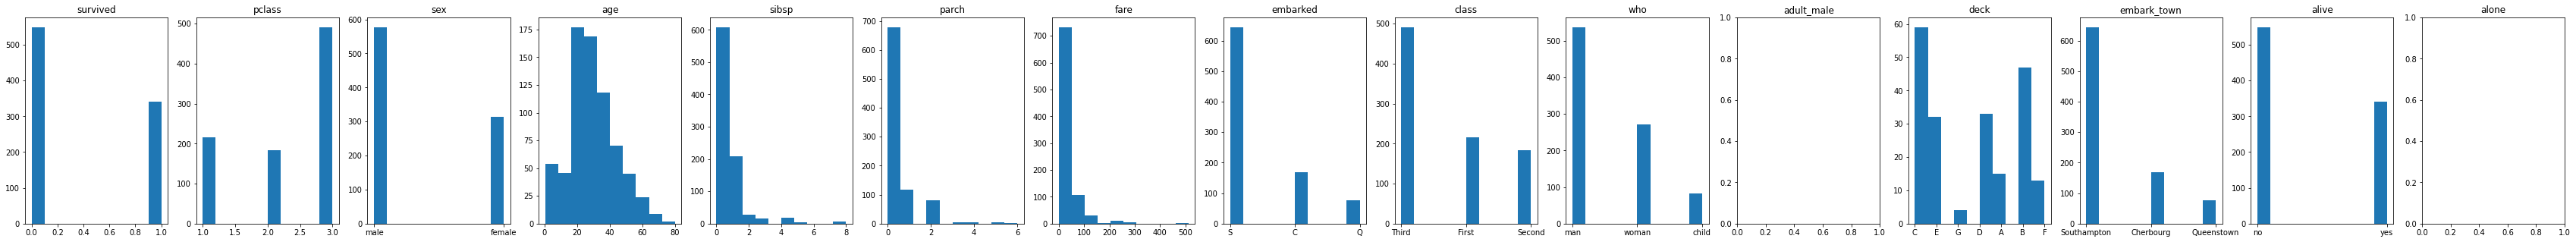

In [ ]:
def hist_plt(idx, param):
  plt.subplot(1,len(params),idx)
  plt.title(param)
  plt.hist(data[param].dropna())

for i in range(0,len(params)):
  try:
    hist_plt(i+1,params[i])
  except:
    print(params[i], "is not shown")

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


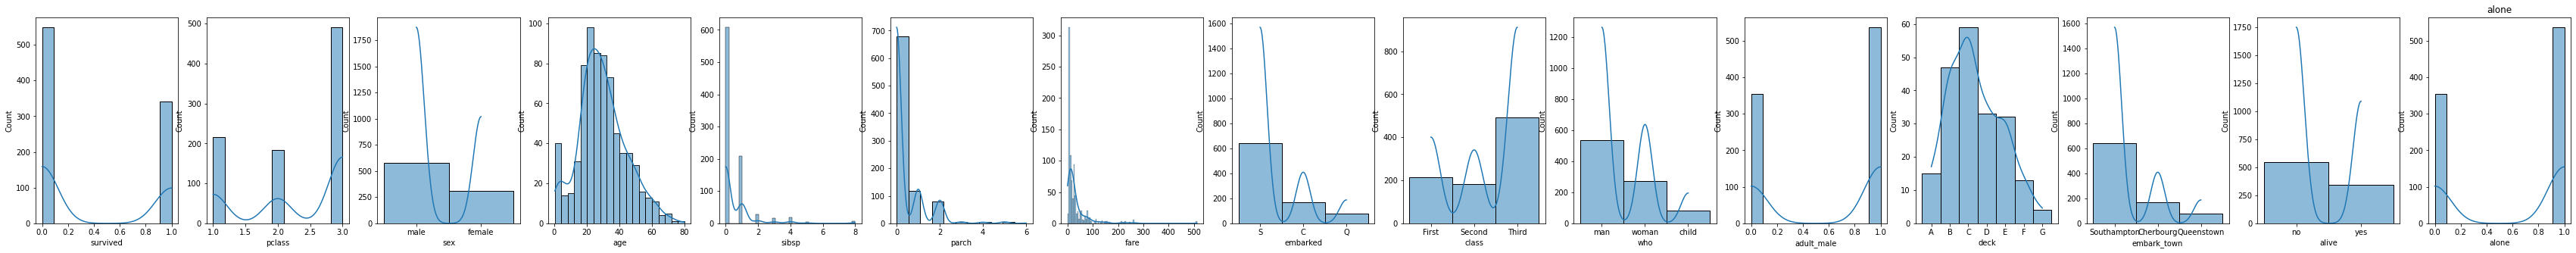

In [ ]:
fig,axes = plt.subplots(1,len(params))
def hist_sns(idx, param):
  plt.title(param)
  sns.histplot(data[param].dropna(), kde=True, ax=axes[idx])

for i in range(0,len(params)):
  try:
    hist_sns(i,params[i])
  except:
    print(params[i], "is not shown")

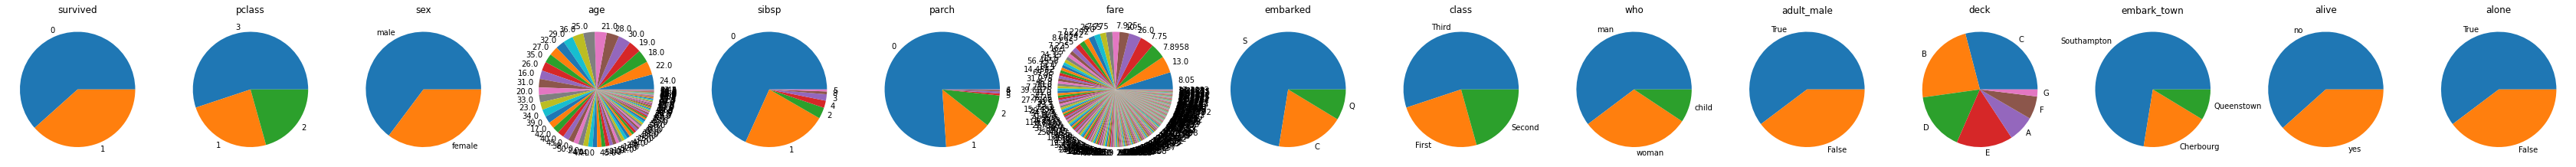

In [ ]:
plt.rcParams["figure.figsize"] = (60,5)
def pie_plt(idx, param):
  a = data[param].value_counts()
  lab = a.index.values.tolist()
  val = a.values.tolist()
  plt.subplot(1,len(params),idx)
  plt.title(param)  
  plt.pie(val, labels=lab)

for i in range(0,len(params)):
  try:
    pie_plt(i+1,params[i])
  except:
    print(params[i], "is not shown")

**Relationship**

---



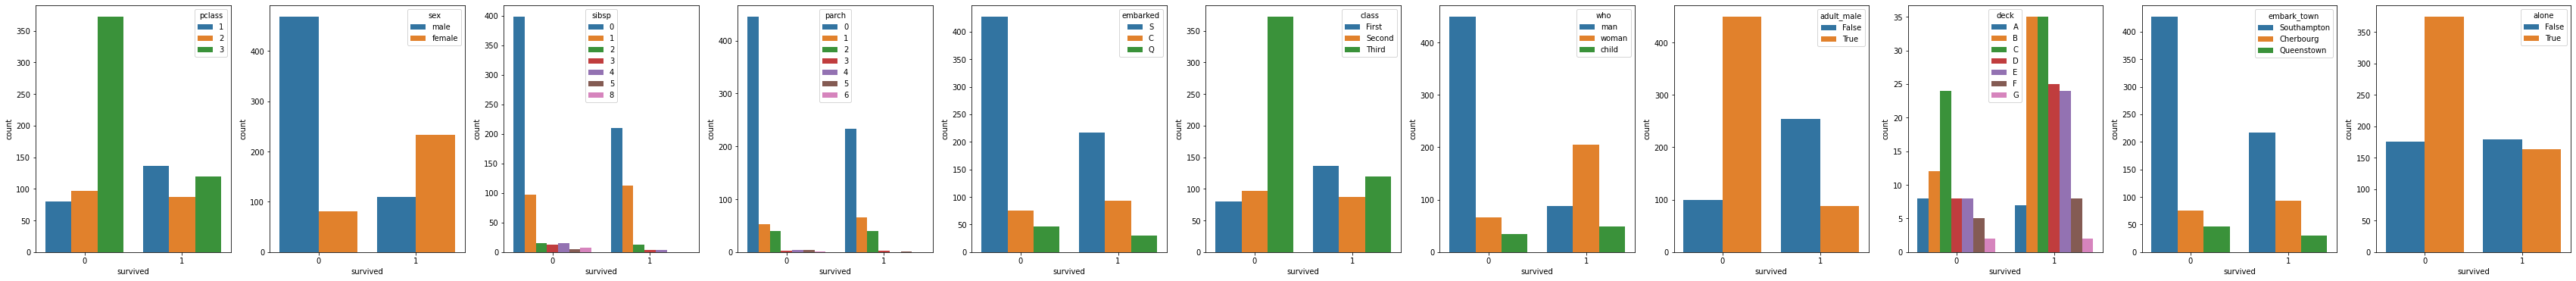

In [ ]:
plt.rcParams['figure.figsize'] = [60,6]
fig,axes = plt.subplots(1,11)
sns.countplot(x='survived', hue='pclass', data=data, ax=axes[0])
sns.countplot(x='survived', hue='sex', data=data, ax=axes[1])
sns.countplot(x='survived', hue='sibsp', data=data, ax=axes[2])
sns.countplot(x='survived', hue='parch', data=data, ax=axes[3])
sns.countplot(x='survived', hue='embarked', data=data, ax=axes[4])
sns.countplot(x='survived', hue='class', data=data, ax=axes[5])
sns.countplot(x='survived', hue='who', data=data, ax=axes[6])
sns.countplot(x='survived', hue='adult_male', data=data, ax=axes[7])
sns.countplot(x='survived', hue='deck', data=data, ax=axes[8])
sns.countplot(x='survived', hue='embark_town', data=data, ax=axes[9])
sns.countplot(x='survived', hue='alone', data=data, ax=axes[10])

**Analyze**
- survived more in high class (1>2>3) (pclass)
- survived more in female and chile (who)

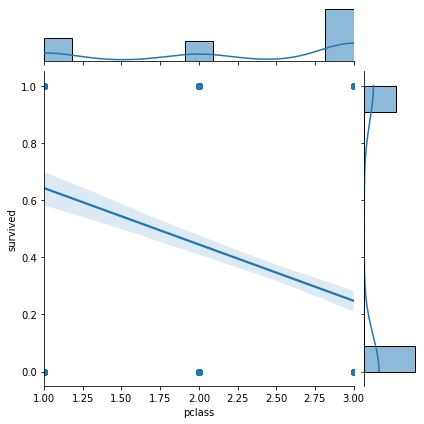

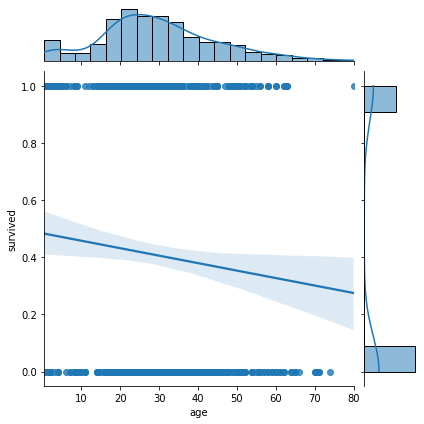

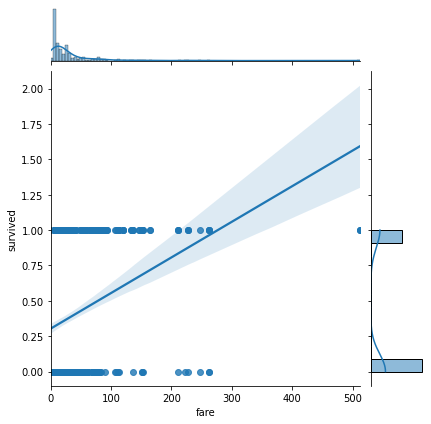

In [ ]:
sns.jointplot(x='pclass', y='survived', data=data, kind='reg')
sns.jointplot(x='age', y='survived', data=data, kind='reg')
sns.jointplot(x='fare', y='survived', data=data, kind='reg')

**Analyze**
- survived more in young age (age)
- survived more in high fare (fare)

From two analysis, kid and female in high class were survived more than others

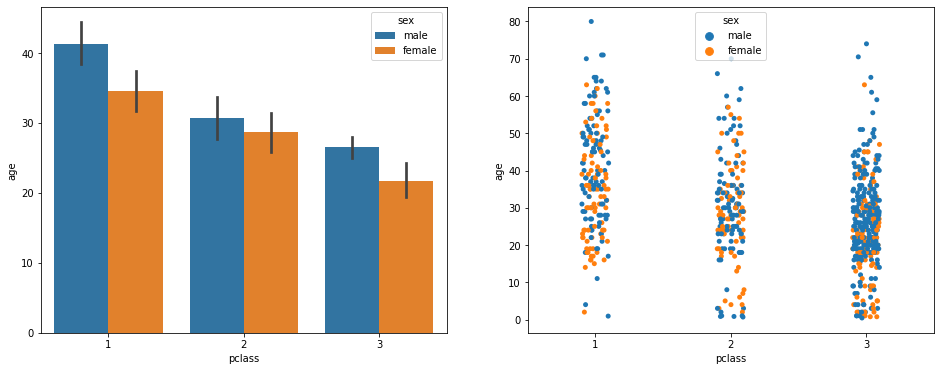

In [ ]:
plt.rcParams['figure.figsize'] = [16,6]
fig,axes = plt.subplots(1,2)
sns.barplot(x='pclass', y='age', hue='sex', data=data, ax=axes[0])
sns.stripplot(x='pclass', y='age', hue='sex', data=data, ax=axes[1])

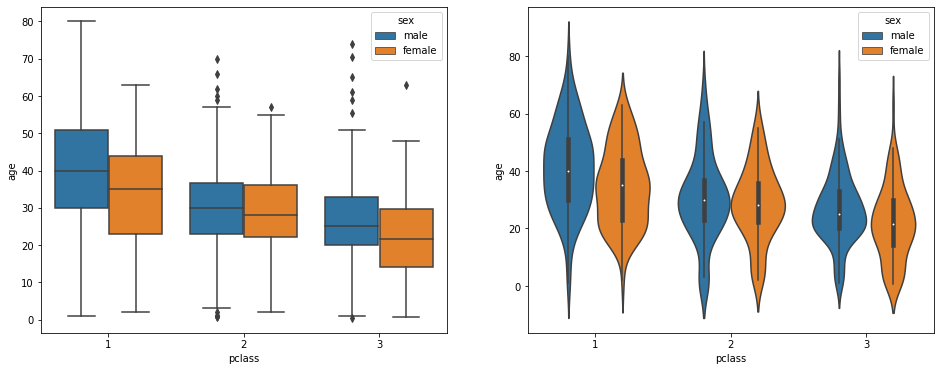

In [ ]:
plt.rcParams['figure.figsize'] = [16,6]
fig,axes = plt.subplots(1,2)
sns.boxplot(x='pclass', y='age', hue='sex', data=data, ax=axes[0])
sns.violinplot(x='pclass', y='age', hue='sex', data=data, ax=axes[1])

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 5.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:2999: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 17.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


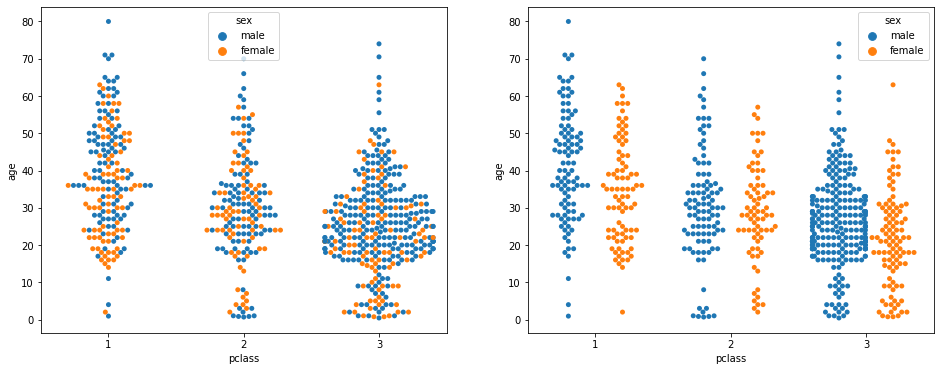

In [ ]:
plt.rcParams['figure.figsize'] = [16,6]
fig,axes = plt.subplots(1,2)
sns.swarmplot(x='pclass', y='age', hue='sex', data=data, ax=axes[0])
sns.swarmplot(x='pclass', y='age', hue='sex', data=data, split=True, ax=axes[1])

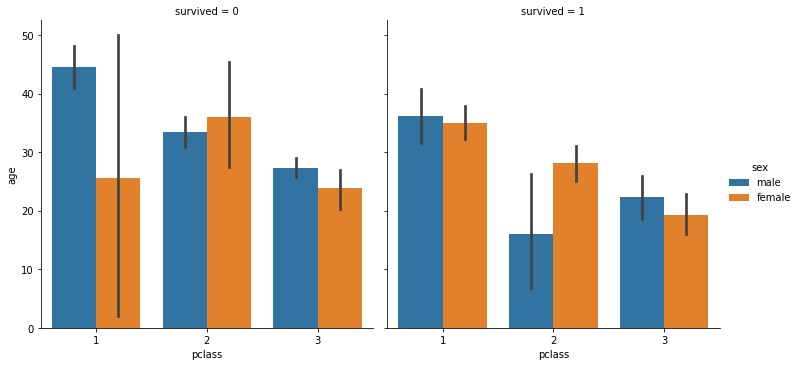

In [ ]:
sns.catplot(x='pclass', y='age', hue='sex', col='survived', data=data, kind='bar')

**Correlation**

---
matrix plot



In [ ]:
corr = abs(data.corr())
corr

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,0.338481,0.077221,0.035322,0.081629,0.257307,0.557080,0.203367
pclass,0.338481,1.000000,0.369226,0.083081,0.018443,0.549500,0.094035,0.135207
age,0.077221,0.369226,1.000000,0.308247,0.189119,0.096067,0.280328,0.198270
sibsp,0.035322,0.083081,0.308247,1.000000,0.414838,0.159651,0.253586,0.584471
parch,0.081629,0.018443,0.189119,0.414838,1.000000,0.216225,0.349943,0.583398
fare,0.257307,0.549500,0.096067,0.159651,0.216225,1.000000,0.182024,0.271832
adult_male,0.557080,0.094035,0.280328,0.253586,0.349943,0.182024,1.000000,0.404744
alone,0.203367,0.135207,0.198270,0.584471,0.583398,0.271832,0.404744,1.000000


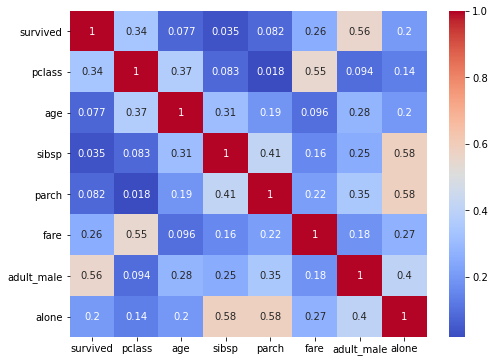

In [ ]:
plt.rcParams['figure.figsize'] = [8,6]
sns.heatmap(corr, annot=True, cmap='coolwarm')

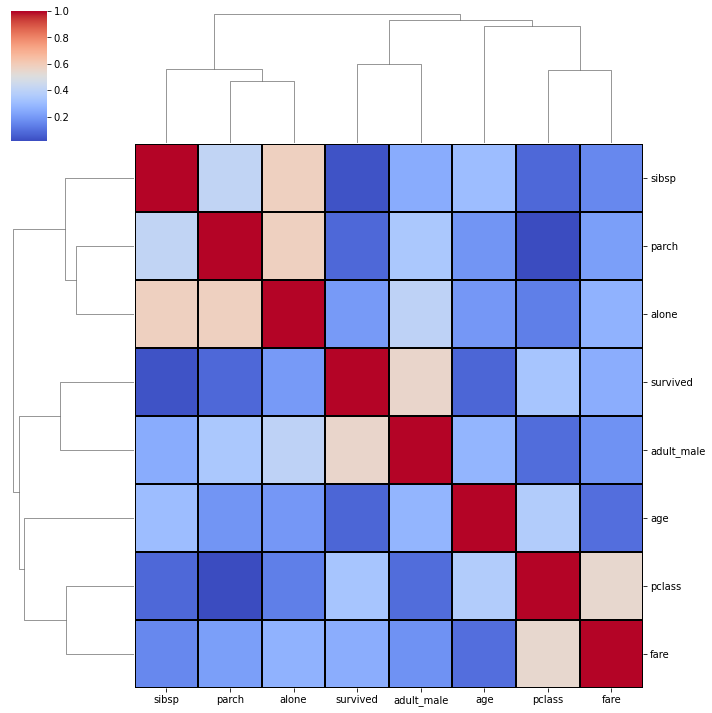

In [ ]:
plt.rcParams['figure.figsize'] = [8,6]
sns.clustermap(corr, cmap='coolwarm', linecolor='black', linewidth=1)

**Regression**


---



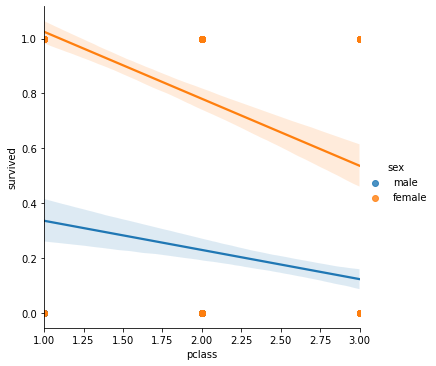

In [ ]:
plt.rcParams['figure.figsize'] = [8,6]
sns.lmplot(x='pclass', y='survived', hue='sex', data=data)


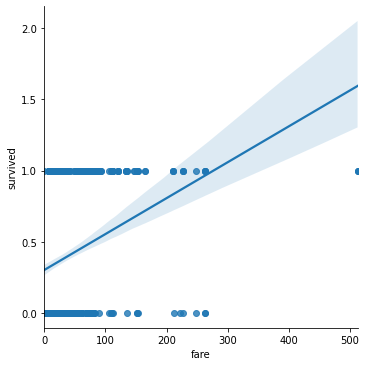

In [ ]:
sns.lmplot(x='fare', y='survived', data=data)

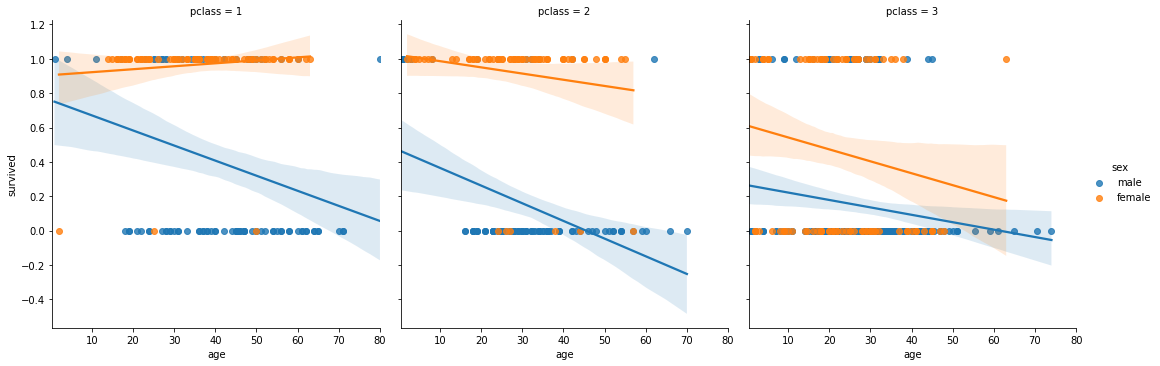

In [ ]:
sns.lmplot(x='age', y='survived', hue='sex', col='pclass', data=data)

**Filtering**

---
From analysis above, old women in class 1 have highest survival rate.
Now, we see the data by filtering


original data

In [ ]:
print(data.shape)
data.head()

(891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
pd.crosstab(data.pclass, data.who, margins=True)

who,child,man,woman,All
pclass,,,,
1,6,119,91,216
2,19,99,66,184
3,58,319,114,491
All,83,537,271,891


In [ ]:
pd.crosstab(data.pclass, data.age, margins=True)

age,0.42,0.67,0.75,0.83,0.92,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,14.5,15.0,16.0,17.0,18.0,19.0,20.0,20.5,21.0,22.0,23.0,23.5,24.0,24.5,25.0,26.0,27.0,28.0,28.5,29.0,30.0,...,36.5,37.0,38.0,39.0,40.0,40.5,41.0,42.0,43.0,44.0,45.0,45.5,46.0,47.0,48.0,49.0,50.0,51.0,52.0,53.0,54.0,55.0,55.5,56.0,57.0,58.0,59.0,60.0,61.0,62.0,63.0,64.0,65.0,66.0,70.0,70.5,71.0,74.0,80.0,All
pclass,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,3,3,4,5,0,0,3,5,3,0,7,0,3,2,4,4,0,3,6,...,0,3,6,5,5,0,1,4,1,3,5,1,2,5,5,5,5,3,4,1,4,1,0,4,0,5,0,3,2,3,1,2,2,0,1,0,2,0,1,186
2,0,1,0,2,0,2,2,3,2,1,1,1,2,0,0,0,0,1,1,0,0,2,2,6,6,0,0,4,2,7,0,10,0,7,2,6,9,0,6,8,...,1,1,1,3,3,0,1,5,1,2,2,0,1,1,2,0,4,1,2,0,4,1,0,0,2,0,1,1,0,1,0,0,0,1,1,0,0,0,0,173
3,1,0,2,0,0,5,7,3,7,3,2,2,2,8,2,3,1,1,4,1,4,12,8,16,14,15,1,17,20,5,1,13,1,13,14,8,12,2,11,11,...,0,2,4,6,5,2,4,4,3,4,5,1,0,3,2,1,1,3,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,355
All,1,1,2,2,1,7,10,6,10,4,3,3,4,8,2,4,1,2,6,1,5,17,13,26,25,15,1,24,27,15,1,30,1,23,18,18,25,2,20,25,...,1,6,11,14,13,2,6,13,5,9,12,2,3,9,9,6,10,7,6,1,8,2,1,4,2,5,2,4,3,4,2,2,3,1,2,1,2,1,1,714


row filtering

In [ ]:
data_filter = data.filter(['survived', 'pclass', 'sex', 'age', 'fare', 'who', 'alone'])
data_filter.head()

,survived,pclass,sex,age,fare,who,alone
0,0,3,male,22.0,7.2500,man,False
1,1,1,female,38.0,71.2833,woman,False
2,1,3,female,26.0,7.9250,woman,True
3,1,1,female,35.0,53.1000,woman,False
4,0,3,male,35.0,8.0500,man,True


In [ ]:
data_filter = data_filter.drop(['alone'], axis=1)
data_filter.head()

,survived,pclass,sex,age,fare,who
0,0,3,male,22.0,7.2500,man
1,1,1,female,38.0,71.2833,woman
2,1,3,female,26.0,7.9250,woman
3,1,1,female,35.0,53.1000,woman
4,0,3,male,35.0,8.0500,man


column filtering

class=1 filtering

In [ ]:
pclass1 = data_filter[data_filter.pclass==1]
print(pclass1.shape)
pclass1.head()

(216, 6)


,survived,pclass,sex,age,fare,who
1,1,1,female,38.0,71.2833,woman
3,1,1,female,35.0,53.1000,woman
6,0,1,male,54.0,51.8625,man
11,1,1,female,58.0,26.5500,woman
23,1,1,male,28.0,35.5000,man


old woman filtering and sort by fare

In [ ]:
old_woman = pclass1[pclass1['age'].isin(range(40,200)) & (pclass1['who']=='woman')]
old_woman_sort = old_woman.sort_values(by=['fare'], ascending=True)
old_woman_sort

,survived,pclass,sex,age,fare,who
862,1,1,female,48.0,25.9292,woman
796,1,1,female,49.0,25.9292,woman
11,1,1,female,58.0,26.5500,woman
194,1,1,female,44.0,27.7208,woman
177,0,1,female,50.0,28.7125,woman
556,1,1,female,48.0,39.6000,woman
571,1,1,female,53.0,51.4792,woman
871,1,1,female,47.0,52.5542,woman
523,1,1,female,44.0,57.9792,woman
513,1,1,female,54.0,59.4000,woman


***Finally, we see that most of old women in class 1 were survived through data visualization technology***